In [52]:
%pip install pandas pd numpy scikit-learn matplotlib seaborn kagglehub shap xgboost lightgbm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub

import shap
import xgboost as xgb
import lightgbm as lgb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [54]:
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")
print("Path to dataset files:", path)

Path to dataset files: /Users/sandymacdonald/.cache/kagglehub/datasets/redwankarimsony/heart-disease-data/versions/6


In [55]:
heart_data = path + "/heart_disease_uci.csv"

In [56]:
heart_disease_df = pd.read_csv(heart_data)

In [57]:
heart_disease_df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

In [58]:
heart_disease_df.shape

(920, 16)

In [59]:
heart_disease_df["num"] = heart_disease_df["num"].apply(lambda x: 1 if x > 0 else 0)

In [60]:
heart_disease_df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    1  
2  reversable defect    1  
3             normal    0  
4             normal    0

In [61]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [62]:
heart_disease_df = heart_disease_df.drop(columns=["id"])
heart_disease_df.head()

age     sex    dataset               cp  trestbps   chol    fbs  \
0   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    1  
2  reversable defect    1  
3             normal    0  
4             normal    0

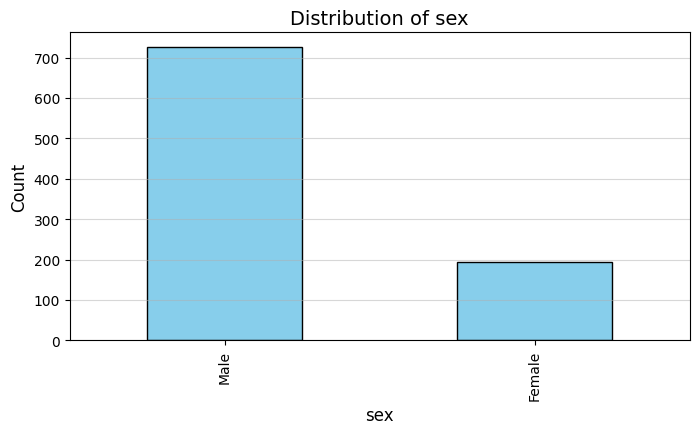

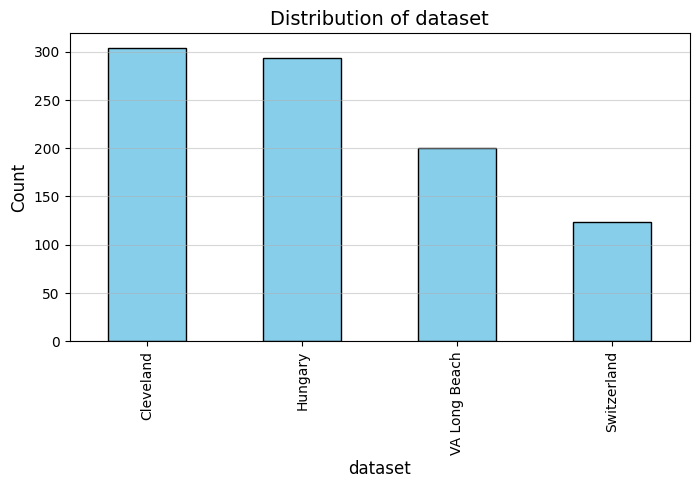

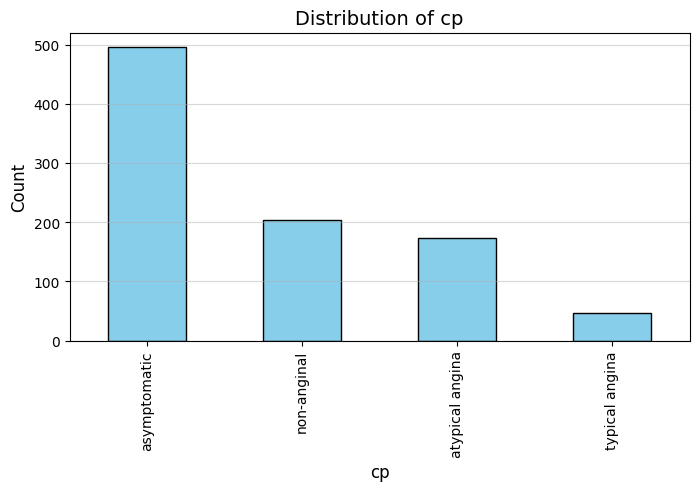

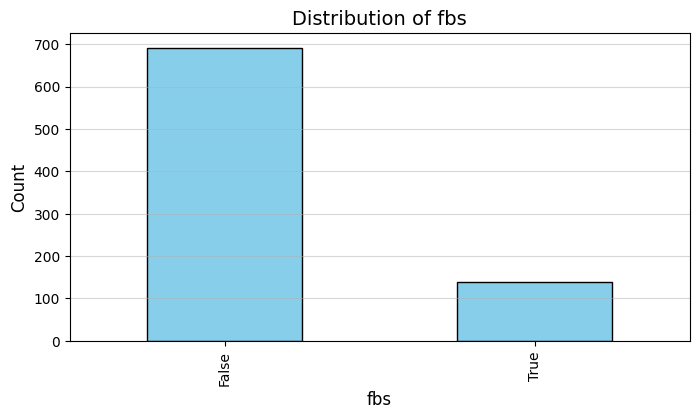

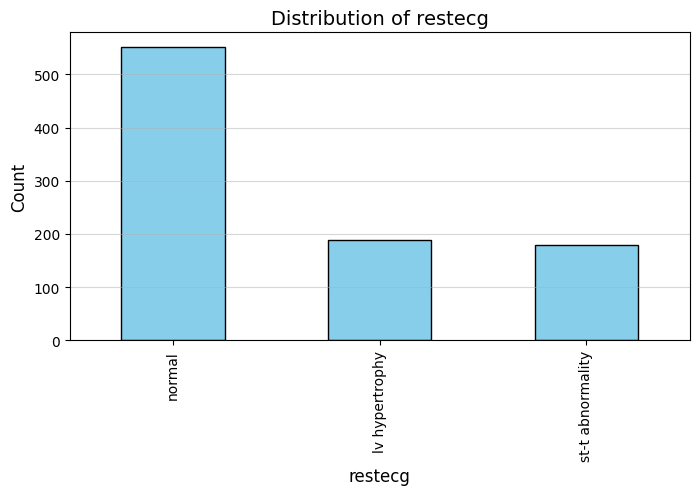

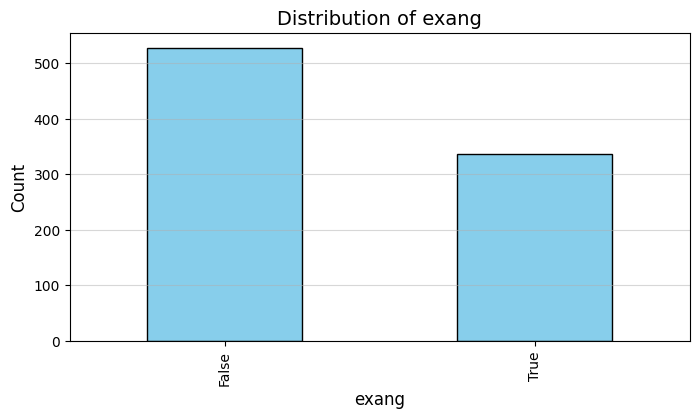

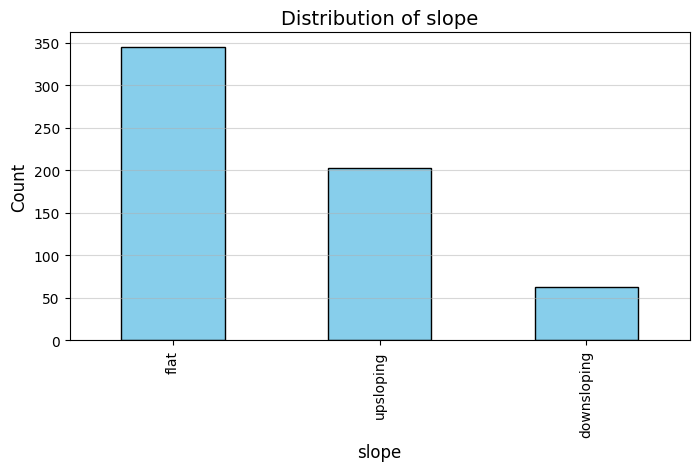

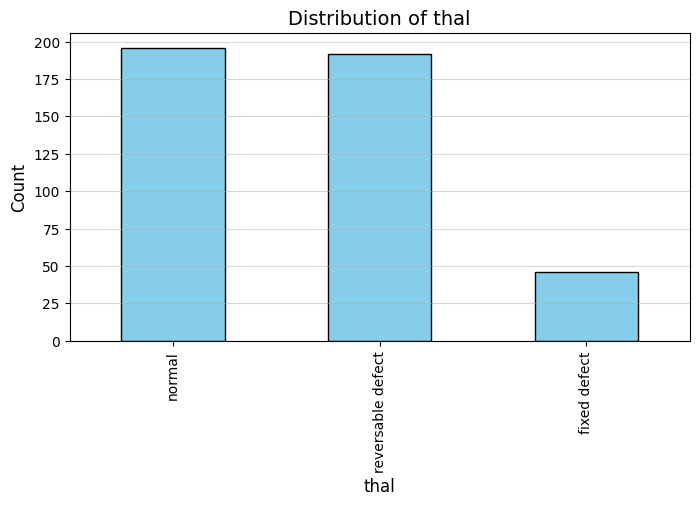

In [63]:
categorical_cols = heart_disease_df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    heart_disease_df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(axis='y', alpha=0.5)
    plt.show()

In [64]:
categorical_cols = heart_disease_df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [65]:
heart_disease_df = pd.get_dummies(heart_disease_df, columns=categorical_cols, drop_first=True)

In [66]:
heart_disease_df.isnull().sum()

age                           0
trestbps                     59
chol                         30
thalch                       55
oldpeak                      62
ca                          611
num                           0
sex_Male                      0
dataset_Hungary               0
dataset_Switzerland           0
dataset_VA Long Beach         0
cp_atypical angina            0
cp_non-anginal                0
cp_typical angina             0
fbs_True                      0
restecg_normal                0
restecg_st-t abnormality      0
exang_True                    0
slope_flat                    0
slope_upsloping               0
thal_normal                   0
thal_reversable defect        0
dtype: int64

In [ ]:
missing_threshold = 0.5
for col in heart_disease_df.columns:
    missing_fraction = heart_disease_df[col].isnull().mean()
    if missing_fraction > missing_threshold:
        heart_disease_df.drop(columns=[col], inplace=True)
    else:
        if heart_disease_df[col].dtype in [np.float64, np.int64]:
            heart_disease_df[col] = heart_disease_df[col].fillna(heart_disease_df[col].median())
        else:
            heart_disease_df[col] = heart_disease_df[col].fillna(heart_disease_df[col].mode()[0])
heart_disease_df.isnull().sum()
heart_disease_df.head()

/var/folders/3n/2q3cc3bx7y38gg_1y0d61_600000gn/T/ipykernel_9537/2465715703.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_disease_df[col].fillna(heart_disease_df[col].median(), inplace=True)
/var/folders/3n/2q3cc3bx7y38gg_1y0d61_600000gn/T/ipykernel_9537/2465715703.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

age  trestbps   chol  thalch  oldpeak  num  sex_Male  dataset_Hungary  \
0   63     145.0  233.0   150.0      2.3    0      True            False   
1   67     160.0  286.0   108.0      1.5    1      True            False   
2   67     120.0  229.0   129.0      2.6    1      True            False   
3   37     130.0  250.0   187.0      3.5    0      True            False   
4   41     130.0  204.0   172.0      1.4    0     False            False   

   dataset_Switzerland  dataset_VA Long Beach  ...  cp_non-anginal  \
0                False                  False  ...           False   
1                False                  False  ...           False   
2                False                  False  ...           False   
3                False                  False  ...            True   
4                False                  False  ...           False   

   cp_typical angina  fbs_True  restecg_normal  restecg_st-t abnormality  \
0               True      True           False                     False   
1              False     False           False                     False   
2              False     False           False                     False   
3              False     False            True                     False   
4              False     False           False                     False   

   exang_True  slope_flat  slope_upsloping  thal_normal  \
0       False       False            False        False   
1        True        True            False         True   
2        True        True            False        False   
3       False       False            False         True   
4       False       False             True         True   

   thal_reversable defect  
0                   False  
1                   False  
2                    True  
3                   False  
4                   False  

[5 rows x 21 columns]

In [68]:
numerical_cols = heart_disease_df.select_dtypes(
    include=[np.float64, np.int64]).columns.tolist()
numerical_cols.remove("num")
scaler = StandardScaler()
heart_disease_df[numerical_cols] = scaler.fit_transform(heart_disease_df[numerical_cols])
heart_disease_df.head()

age  trestbps      chol    thalch   oldpeak  num  sex_Male  \
0  1.007386  0.705176  0.303643  0.489727  1.368109    0      True   
1  1.432034  1.518569  0.789967 -1.181478  0.611589    1      True   
2  1.432034 -0.650479  0.266939 -0.345875  1.651804    1      True   
3 -1.752828 -0.108217  0.459634  1.961979  2.502889    0      True   
4 -1.328180 -0.108217  0.037541  1.365120  0.517024    0     False   

   dataset_Hungary  dataset_Switzerland  dataset_VA Long Beach  ...  \
0            False                False                  False  ...   
1            False                False                  False  ...   
2            False                False                  False  ...   
3            False                False                  False  ...   
4            False                False                  False  ...   

   cp_non-anginal  cp_typical angina  fbs_True  restecg_normal  \
0           False               True      True           False   
1           False              False     False           False   
2           False              False     False           False   
3            True              False     False            True   
4           False              False     False           False   

   restecg_st-t abnormality  exang_True  slope_flat  slope_upsloping  \
0                     False       False       False            False   
1                     False        True        True            False   
2                     False        True        True            False   
3                     False       False       False            False   
4                     False       False       False             True   

   thal_normal  thal_reversable defect  
0        False                   False  
1         True                   False  
2        False                    True  
3         True                   False  
4         True                   False  

[5 rows x 21 columns]

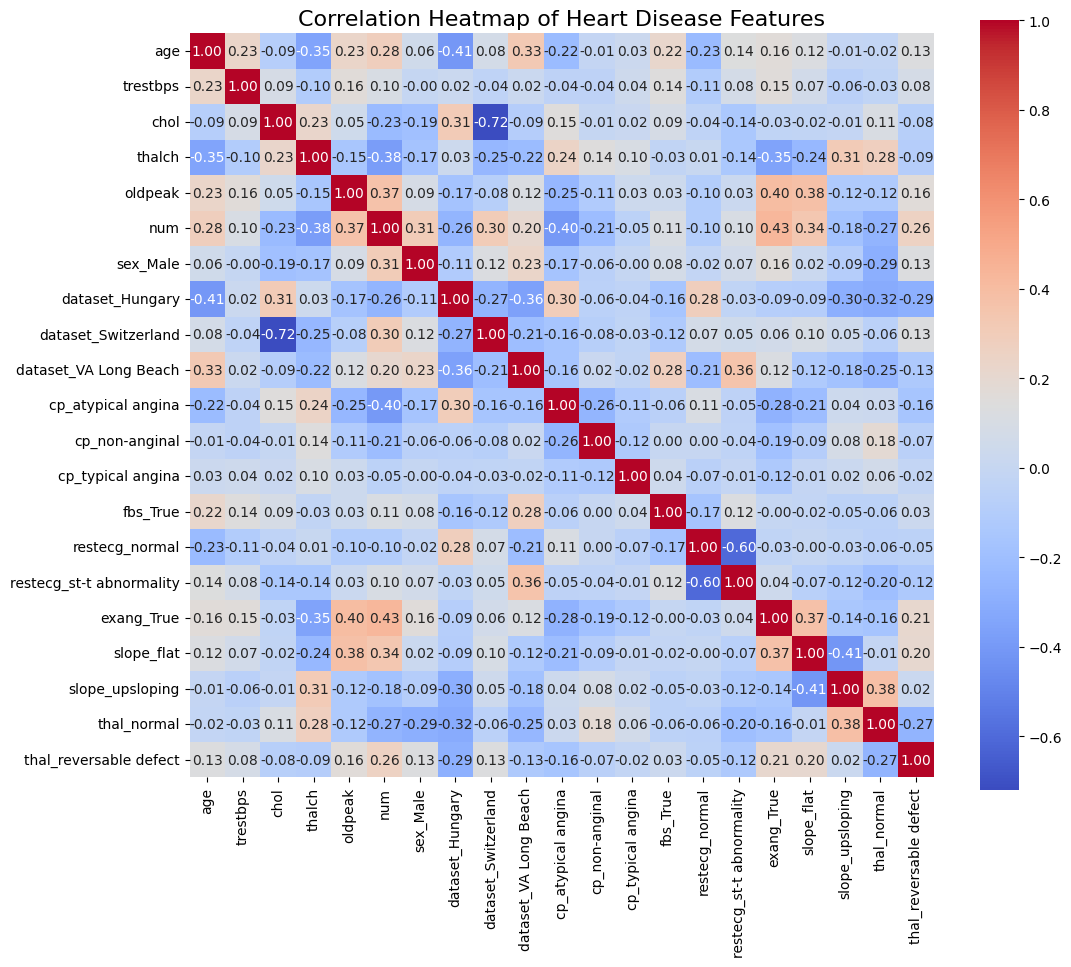

In [69]:
plt.figure(figsize=(12, 10))
correlation_matrix = heart_disease_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Heart Disease Features', fontsize=16)
plt.show()

In [70]:
X = heart_disease_df.drop("num", axis=1)
y = heart_disease_df["num"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### **XGBoost**

In [72]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

/Users/sandymacdonald/Documents/Projects/GroupHeart/.venv/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [00:50:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [73]:
y_pred_xgb = xgb_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print('ROC AUC:', roc_auc_score(y_test, y_pred_xgb))

[[64 11]
 [18 91]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.82        75
           1       0.89      0.83      0.86       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

ROC AUC: 0.8440978593272171


In [74]:
# XGBoost hyperparameter grid search
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
xgb_grid = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                      xgb_param_grid,
                      cv=5,
                      scoring='roc_auc',
                      n_jobs=-1,
                      verbose=1)
xgb_grid.fit(X_train, y_train)
print('Best XGBoost Params:', xgb_grid.best_params_)
print('Best XGBoost CV ROC AUC:', xgb_grid.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/opt/homebrew/Cellar/python@3.11/3.11.14_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.11/3.11.14_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.11/3.11.14_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API.

Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best XGBoost CV ROC AUC: 0.8932791922739245


## **LightGBM**

In [75]:
lgb_clf = lgb.LGBMClassifier(random_state=42)
lgb_clf.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 400, number of negative: 336
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 736, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.543478 -> initscore=0.174353
[LightGBM] [Info] Start training from score 0.174353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMClassifier(random_state=42)

In [76]:
y_pred_lgb = lgb_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))
print('ROC AUC:', roc_auc_score(y_test, y_pred_lgb))

[[64 11]
 [15 94]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        75
           1       0.90      0.86      0.88       109

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.86      0.86       184

ROC AUC: 0.8578593272171254


In [77]:
# LightGBM hyperparameter grid search
lgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
lgb_grid = GridSearchCV(lgb.LGBMClassifier(random_state=42),
                      lgb_param_grid,
                      cv=5,
                      scoring='roc_auc',
                      n_jobs=-1,
                      verbose=1)
lgb_grid.fit(X_train, y_train)
print('Best LightGBM Params:', lgb_grid.best_params_)
print('Best LightGBM CV ROC AUC:', lgb_grid.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 320, number of negative: 269
[LightGBM] [Info] Number of positive: 320, number of negative: 268
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Number of positive: 320, number of negative: 269
[LightGBM] [Info] Total Bins 338
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [

### **SHAP**

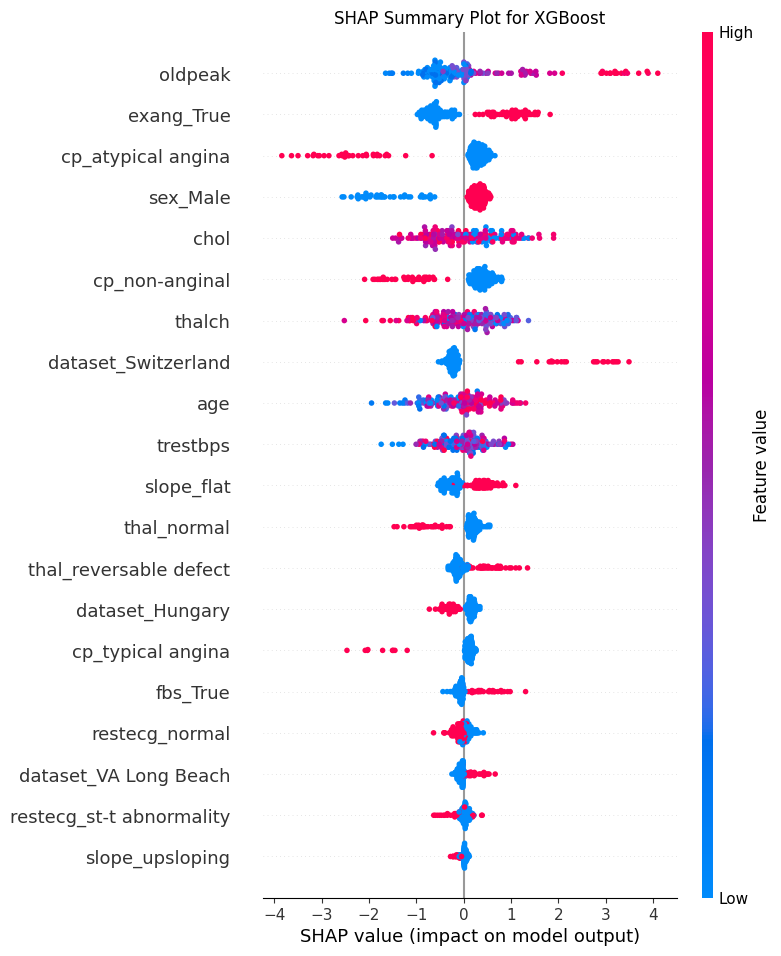

In [78]:
# SHAP explanation for XGBoost
# Ensure X_test is a numpy array for SHAP compatibility
explainer_xgb = shap.TreeExplainer(xgb_clf)
shap_values_xgb = explainer_xgb.shap_values(X_test.values)
shap.summary_plot(shap_values_xgb, X_test, show=False)
plt.title('SHAP Summary Plot for XGBoost')
plt.show()

/Users/sandymacdonald/Documents/Projects/GroupHeart/.venv/lib/python3.11/site-packages/shap/explainers/_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


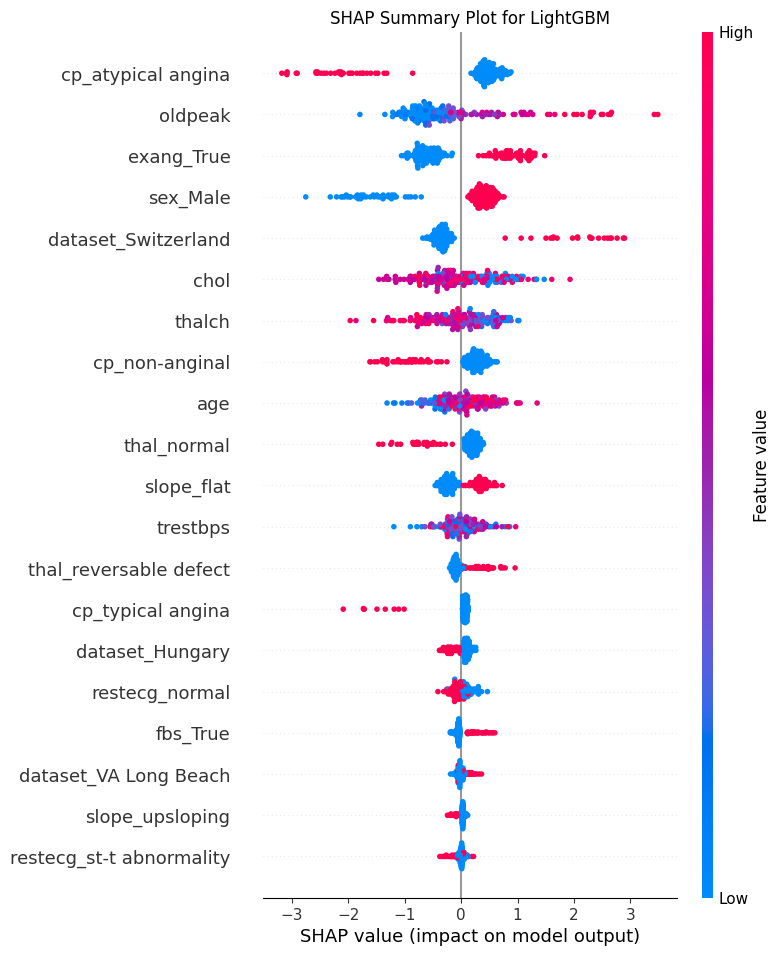

In [79]:
# SHAP explanation for LightGBM
# Ensure X_test is a numpy array for SHAP compatibility
explainer_lgb = shap.TreeExplainer(lgb_clf)
shap_values_lgb = explainer_lgb.shap_values(X_test.values)
shap.summary_plot(shap_values_lgb, X_test, show=False)
plt.title('SHAP Summary Plot for LightGBM')
plt.show()